In [1]:
#PRIMERA PARTE: IMPLEMENTACIÓN ALGORITMO WHITE-PATCH

In [55]:
import numpy as np # type: ignore
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
# Cargar imagen
img = cv.imread("test_blue.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (100, 278, 3) pix
[[[139 105 168]
  [144 111 172]
  [144 111 172]
  ...
  [127  98 150]
  [125  96 149]
  [133 105 155]]

 [[142 109 170]
  [147 115 174]
  [147 115 174]
  ...
  [130 102 153]
  [128 100 151]
  [136 109 158]]

 [[142 109 170]
  [147 115 174]
  [147 115 174]
  ...
  [130 102 153]
  [128 100 151]
  [136 109 158]]

 ...

 [[152 126 180]
  [155 128 184]
  [155 127 186]
  ...
  [  5   4   8]
  [  1   0   4]
  [ 16  16  19]]

 [[153 127 183]
  [156 129 184]
  [159 131 190]
  ...
  [  3   2   6]
  [  0   0   3]
  [ 15  14  18]]

 [[154 128 183]
  [157 130 185]
  [160 132 190]
  ...
  [  6   5   9]
  [  2   1   5]
  [ 17  16  20]]]


In [9]:
def mostrar_imagen(img, cmap=None):
    
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

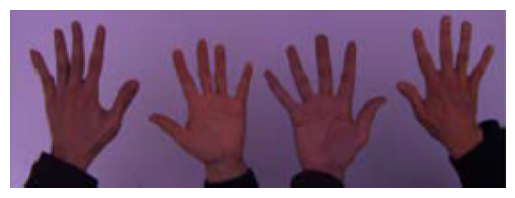

In [11]:
mostrar_imagen(img)

In [13]:
def white_patch(img):
    
    #Calculo el valor máximo de cada canal (R, G, B)
    R_max = np.max(img[:, :, 0])  # Canal Rojo
    G_max = np.max(img[:, :, 1])  # Canal Verde
    B_max = np.max(img[:, :, 2])  # Canal Azul

    #Genero el vector [R, G, B] de máximos
    max_rgb = np.array([R_max, G_max, B_max])
    print("Vector [R, G, B] (valores máximos):", max_rgb)

    #Calculo el vector de escala
    scale = 255.0 / max_rgb
    print("Vector scale [s_R, s_G, s_B]:", scale)

    #Aplico la corrección a cada canal por separado
    corrected = np.zeros_like(img)
    for c in range(3):
        corrected[:, :, c] = np.clip(img[:, :, c] * scale[c], 0, 255)

    #Convierto a uint8 para visualizar o guardar
    corrected_uint8 = corrected.astype(np.uint8)
    return corrected_uint8

In [15]:
#Aplico algoritmo White Patch
img_wp = white_patch(img)

Vector [R, G, B] (valores máximos): [165 138 200]
Vector scale [s_R, s_G, s_B]: [1.54545455 1.84782609 1.275     ]


In [17]:
#Visualización imagen corregida
cv.imshow("White Patch aplicado", img_wp)


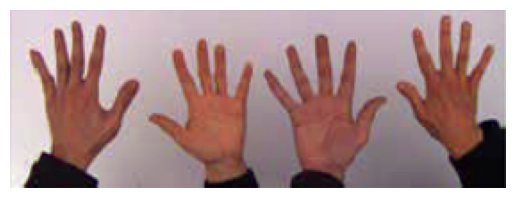

In [19]:
mostrar_imagen(img_wp)

In [21]:
#Prueba otra imagen
img = cv.imread("test_green.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (100, 278, 3) pix
[[[174 210 128]
  [180 213 136]
  [181 213 137]
  ...
  [157 189 120]
  [153 186 115]
  [171 198 139]]

 [[178 212 134]
  [183 215 142]
  [184 215 143]
  ...
  [162 192 126]
  [158 189 122]
  [175 200 145]]

 [[178 212 134]
  [183 215 142]
  [184 215 143]
  ...
  [161 191 126]
  [158 189 122]
  [175 200 145]]

 ...

 [[195 244 138]
  [199 245 146]
  [199 246 154]
  ...
  [  6   6   6]
  [  0   0   0]
  [ 42  42  42]]

 [[198 250 142]
  [202 250 149]
  [198 247 153]
  ...
  [  6   6   6]
  [  0   0   0]
  [ 42  42  42]]

 [[196 249 136]
  [199 250 144]
  [195 247 148]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 32  32  32]]]


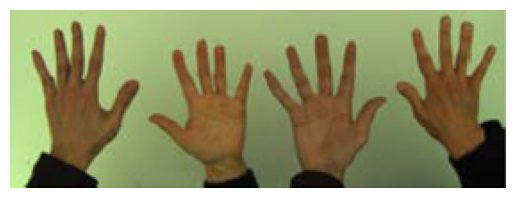

In [23]:
mostrar_imagen(img)

In [25]:
img2_wp = white_patch(img)

Vector [R, G, B] (valores máximos): [210 250 171]
Vector scale [s_R, s_G, s_B]: [1.21428571 1.02       1.49122807]


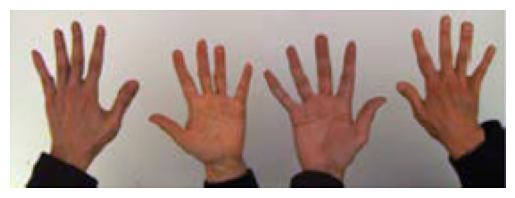

In [27]:
mostrar_imagen(img2_wp)

In [29]:
#Prueba otra imagen
img = cv.imread("test_red.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (99, 276, 3) pix
[[[222 134 158]
  [223 135 158]
  [223 135 159]
  ...
  [193 119 137]
  [193 119 137]
  [191 114 133]]

 [[222 134 158]
  [223 135 158]
  [223 135 159]
  ...
  [193 119 137]
  [193 119 137]
  [191 114 133]]

 [[222 134 158]
  [223 135 158]
  [223 135 159]
  ...
  [193 119 137]
  [193 119 137]
  [191 114 133]]

 ...

 [[230 151 169]
  [228 147 167]
  [232 146 165]
  ...
  [  9   5   9]
  [  9   5   9]
  [  1   0   1]]

 [[230 153 174]
  [228 151 172]
  [239 151 173]
  ...
  [  9   5   9]
  [  9   5   9]
  [  1   0   1]]

 [[228 149 172]
  [227 148 170]
  [242 147 173]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


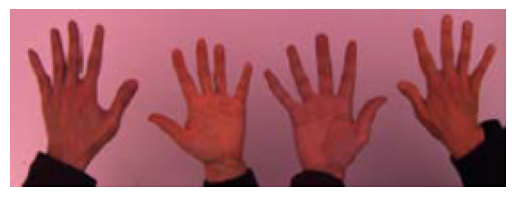

In [31]:
mostrar_imagen(img)

In [33]:
img3_wp = white_patch(img)

Vector [R, G, B] (valores máximos): [247 157 175]
Vector scale [s_R, s_G, s_B]: [1.03238866 1.62420382 1.45714286]


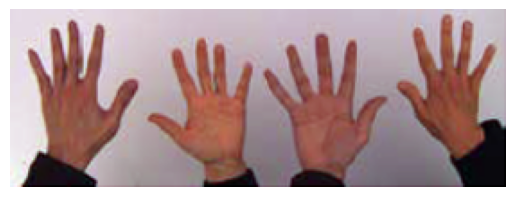

In [35]:
mostrar_imagen(img3_wp)

In [37]:
#SEGUNDA PARTE

In [39]:
# Leer imágenes en escala de grises
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

In [41]:
# Verificar si se cargaron bien
if img1 is None or img2 is None:
    raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar. Verificá el nombre o la ruta.")

(-0.5, 286.5, 287.5, -0.5)

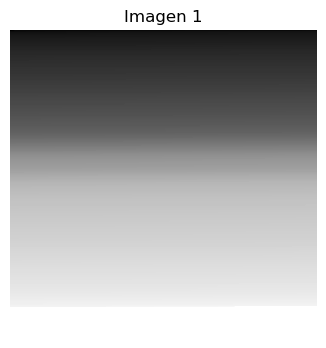

In [43]:
# Mostrar imágenes
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1')
plt.axis('off')

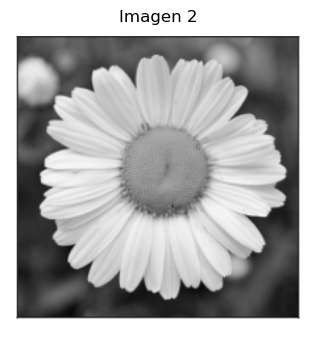

In [45]:
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2')
plt.axis('off')
plt.tight_layout()
plt.show()

In [47]:
bins = 64
rango = [0, 256]

# Calcular histogramas

hist1 = cv.calcHist([img1], [0], None, [bins], rango).flatten()
hist2 = cv.calcHist([img2], [0], None, [bins], rango).flatten()
bin_edges = np.linspace(rango[0], rango[1], bins)

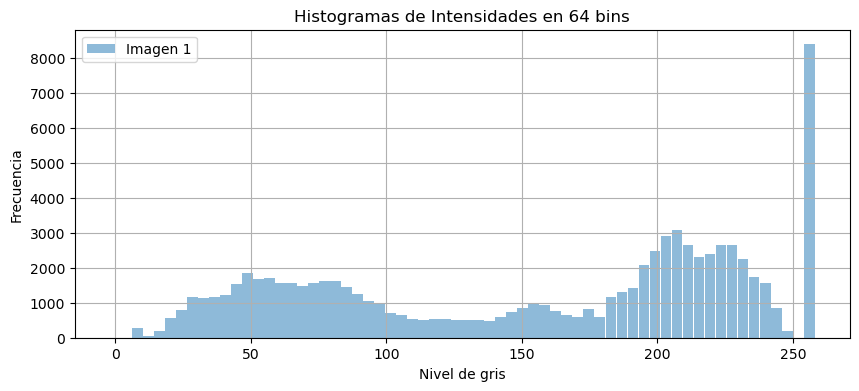

In [49]:
# Mostrar histogramas como barras

plt.figure(figsize=(10, 4))
plt.bar(bin_edges, hist1, width=256/bins, alpha=0.5, label='Imagen 1')

#plt.bar(bin_edges, hist2, width=256/bins, alpha=0.5, label='Imagen 2')

plt.title(f'Histogramas de Intensidades en {bins} bins')
plt.xlabel('Nivel de gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

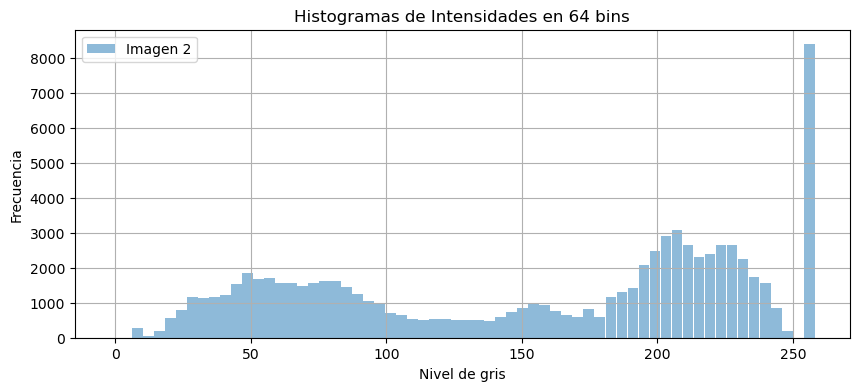

In [51]:
plt.figure(figsize=(10, 4))

#plt.bar(bin_edges, hist1, width=256/bins, alpha=0.5, label='Imagen 1')

plt.bar(bin_edges, hist2, width=256/bins, alpha=0.5, label='Imagen 2')
plt.title(f'Histogramas de Intensidades en {bins} bins')
plt.xlabel('Nivel de gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#Los histogramas pueden ser utilizados como features para clasificación/detección de imágenes siempre y cuando se puedan utilizar como 
#histogramas de gradientes orientados (HOG) o cobinándlos con otras técnicas como las vistas para el TP2. En las imágene vistas en este ejemplo, ambas
#imágenes tienen el mismo gradiente pero las imágenes son completamente distintas, por eso hay que tomar estrategias como las mencionadas anteriormente 
#para lograr implementar los histogramas como features. 